# Titanic - Machine Learning from Disaster

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png" width=900>

- Vamos utilizar os [dados disponíveis no Kaggle](https://www.kaggle.com/competitions/titanic)

---

## **Segue abaixo a explicação de cada coluna desse Dataset:**


    - Passengerird: Identificador único para cada passageiro;
    - Survived: Indica se o passageiro sobreviveu, onde (0-Não; 1-Sim)
    - Pclass: Classe do passageiro (1 - Primeira Classe; 2- Segunda Classe; 3- Terceira Classe;
    - Name: Nome do passageiro;
    - Sex: Sexo do passageiro;
    - Age: Idade do passageiro;
    - SibSp: Número de irmãos - esposas a bordo;
    - Parch: Numero de pais-filhos a bordo;
    - Ticket: Número da passagem;
    - Fare: Preço da passagem;
    - Cabin: Cabine;
    - Embarked: Local onde o passageiro embarcou (C=Cherbourg, Q= Queenstown, S= Southampton)

---

-  **Importação das bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.75)
import warnings
warnings.filterwarnings('ignore')

- **Carregando as bases**

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

---

## Visualizando as bases

- **Visualização da base de treino**

In [3]:
# Visualizando os primeiros valores
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Visualização da base de teste**

In [4]:
# Visualizando os primeiros valores
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


---

## Começando a entender os nossos dados

- ### **Informações da base de treino**

In [5]:
# Verificando as informações da base
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Verificando as descrições estatísticas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Verificando os valores nulos
train.isnull().sum().sort_values(ascending=False).head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [8]:
# Verificando o tipo dos dados
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

---

- ### **Informações da base de teste**

In [9]:
# Verificando as informações da base
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# Verificando as descrições estatísticas
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# Verificando os valores nulos
train.isnull().sum().sort_values(ascending=False).head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [12]:
# Verificando os valores nulos
test.isnull().sum().sort_values(ascending=False).head()

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

In [13]:
# Verificando o tipo dos dados
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Temos colunas que **possuem valores vazios na base de teste que não estão vazias na base de treino** (nesse caso, precisaríamos tratar essas colunas apenas na base de teste)

---

## Realizando os tratamentos iniciais dos Dados

- **Podemos começar tratando os valores vazios**

In [14]:
# Verificando novamente valores vazios para a base de treino
train.isnull().sum().sort_values(ascending = False).head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [15]:
# Retornando o shape da base
train.shape

(891, 12)

In [16]:
# Visualizando novamente a base
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Verificando a cardinalidade dos dados
train.nunique().sort_values(ascending = False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

- Colunas com **alta cardinalidade** como nome, número do ticket e até mesmo o código da cabine não vão ajudar o modelo pois podem torná-lo **menos generalizável**. Nesse caso, vamos **eliminar essas colunas**

In [18]:
# Eliminando para a base de treino
train = train.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [19]:
# Também eliminando para a base de teste
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

- Agora precisamos tratar a coluna **Age**, que possui valores vazios tanto no treino quanto no teste
    - Como essa coluna possui a idade dos passageiros, podemos utilizar a **a mediana das idades** para substituir os valores vazios

In [20]:
# Verificando a mediana das idades para a base de treino
train.Age.median()

28.0

In [21]:
# Ou podemos, por exemplo, tirar a mediana de idade por alguns grupos como o Pclass
train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [22]:
# Podemos adicionar o gênero
train.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [23]:
# Podemos agora selecionar as colunas com idade vazia e substituir por essa mediana
train['Age'] = train.Age.fillna(train.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [24]:
# Verificando novamente valores nulos
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [25]:
# Fazendo o mesmo para a base de teste
test['Age'] = test.Age.fillna(test.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [26]:
# Verificando novamente valores nulos
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

- Para a base de treino, ainda temos 2 valores vazios na coluna **Embarked**
    - Podemos verificar todos os valores nessa coluna e substituir os valores vazios pela **moda**

In [27]:
# Verificando os valores na coluna Embarked
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
# Selecionando a moda dessa coluna
train.Embarked.mode()[0]

'S'

In [29]:
# Substituindo os valores vazios
train.loc[train.Embarked.isnull(), 'Embarked'] = train.Embarked.mode()[0]

- Para finalizar, para a base de teste ainda temos 1 valor vazio em **Fare**
    - Podemos utilizar a mesma lógica que fizemos para a coluna Age e substituir pela **média**

In [30]:
# Verificando o valor nulo da coluna Fare
test.loc[test.Fare.isnull(), 'Fare']

152   NaN
Name: Fare, dtype: float64

In [31]:
# Verificando a média das taxas para a base de teste
test.Fare.mean()

35.6271884892086

In [32]:
# Ou podemos, por exemplo, tirar a média das taxas por alguns grupos como o Pclass
test.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [33]:
# Podemos adicionar o gênero
test.groupby(['Pclass', 'Sex'])['Fare'].mean()

Pclass  Sex   
1       female    115.591168
        male       75.586551
2       female     26.438750
        male       20.184654
3       female     13.735129
        male       11.826350
Name: Fare, dtype: float64

In [34]:
# Podemos agora selecionar as colunas com taxa vazia e substituir por essa média
test['Fare'] = test.Fare.fillna(test.groupby(['Pclass', 'Sex'])['Fare'].transform('mean'))

- **Verificando novamente os valores vazios**

In [35]:
# Para a base de treino
train.isnull().sum().sort_values(ascending = False).head()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [36]:
# Para a base de teste
test.isnull().sum().sort_values(ascending = False).head()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

---

## Análise Exploratória Titanic

- **Usaremos alguns gráficos para facilitar a nossa análise**

- Elaborando Histograma para mostrar a faixa de idade dos passageiros

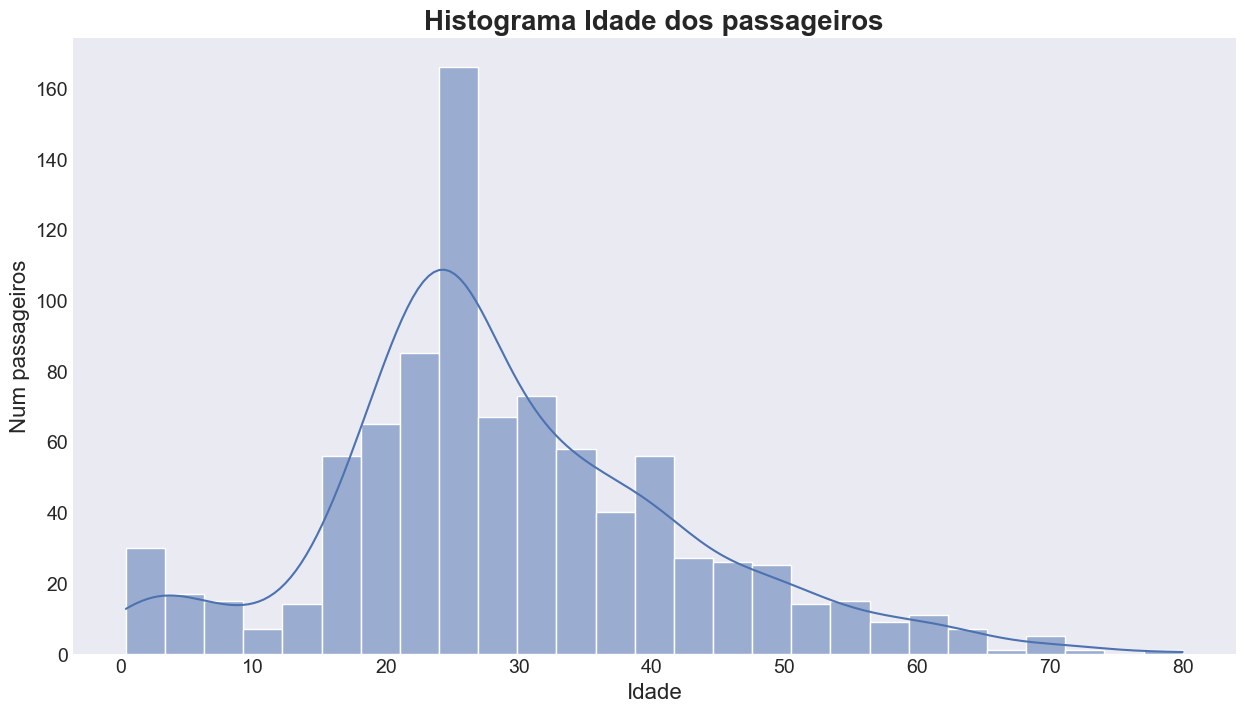

In [37]:
plt.figure(figsize=(15, 8))
plt.style.use('seaborn-dark')
plt.title('Histograma Idade dos passageiros', fontsize=20, fontweight='bold')
sns.histplot(train.Age, kde=True)
plt.xlabel('Idade', fontsize=16)
plt.ylabel('Num passageiros', fontsize=16)
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.show()

- Vamos analisar a taxa de sobreviventes x não sobreviventes por sexo

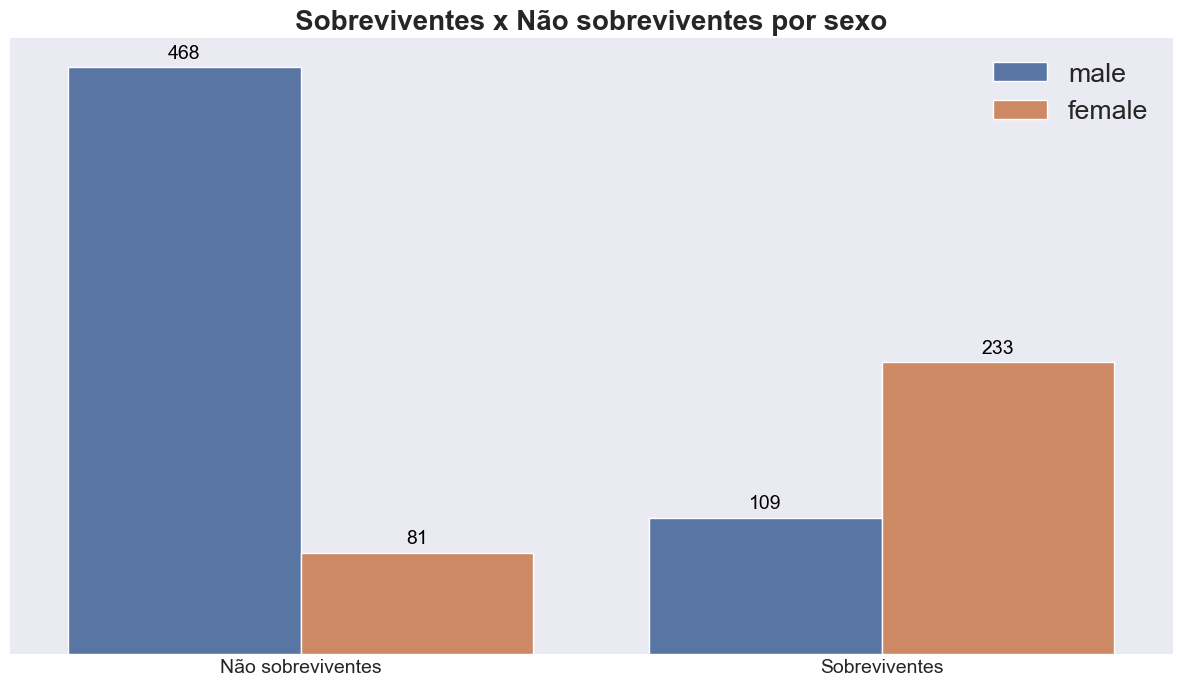

In [38]:
plt.figure(figsize=(15, 8))
plt.style.use('seaborn-dark')
plt.title('Sobreviventes x Não sobreviventes por sexo', fontsize=20, fontweight='bold')

graf = sns.countplot(data=train, x='Survived', hue='Sex')

# Adicionar os valores acima das barras
for p in graf.patches:
    graf.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', fontsize=14, color='black', xytext=(0, 10), 
                  textcoords='offset points')

plt.legend(loc='upper right')
graf.set_xlabel('')
graf.set_ylabel('')
graf.set_yticklabels([])
graf.set_xticklabels(["Não sobreviventes", "Sobreviventes"], fontsize=14)

plt.tick_params(axis='y', labelsize=14)
plt.show()

- Análise de Sobreviventes x não sobreviventes por faixa de idade

<Figure size 1800x1000 with 0 Axes>

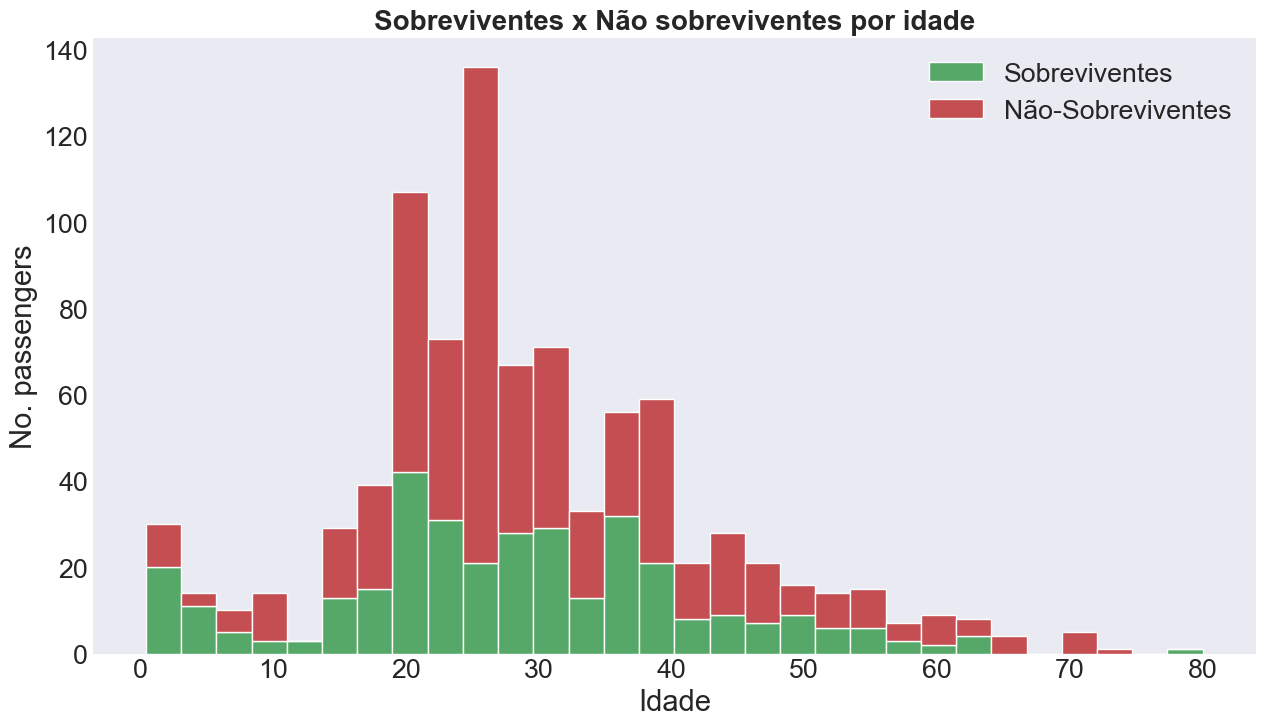

In [39]:
plt.figure( figsize=(18, 10) )
plt.style.use('seaborn-dark')
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], 
         stacked=True, color=['g','r'],
         bins=30, label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('No. passengers')
plt.title('Sobreviventes x Não sobreviventes por idade', fontsize=20, fontweight='bold')
plt.legend()
plt.show()

## Verificação dos grupos que tiveram mais chance de sobrevivência

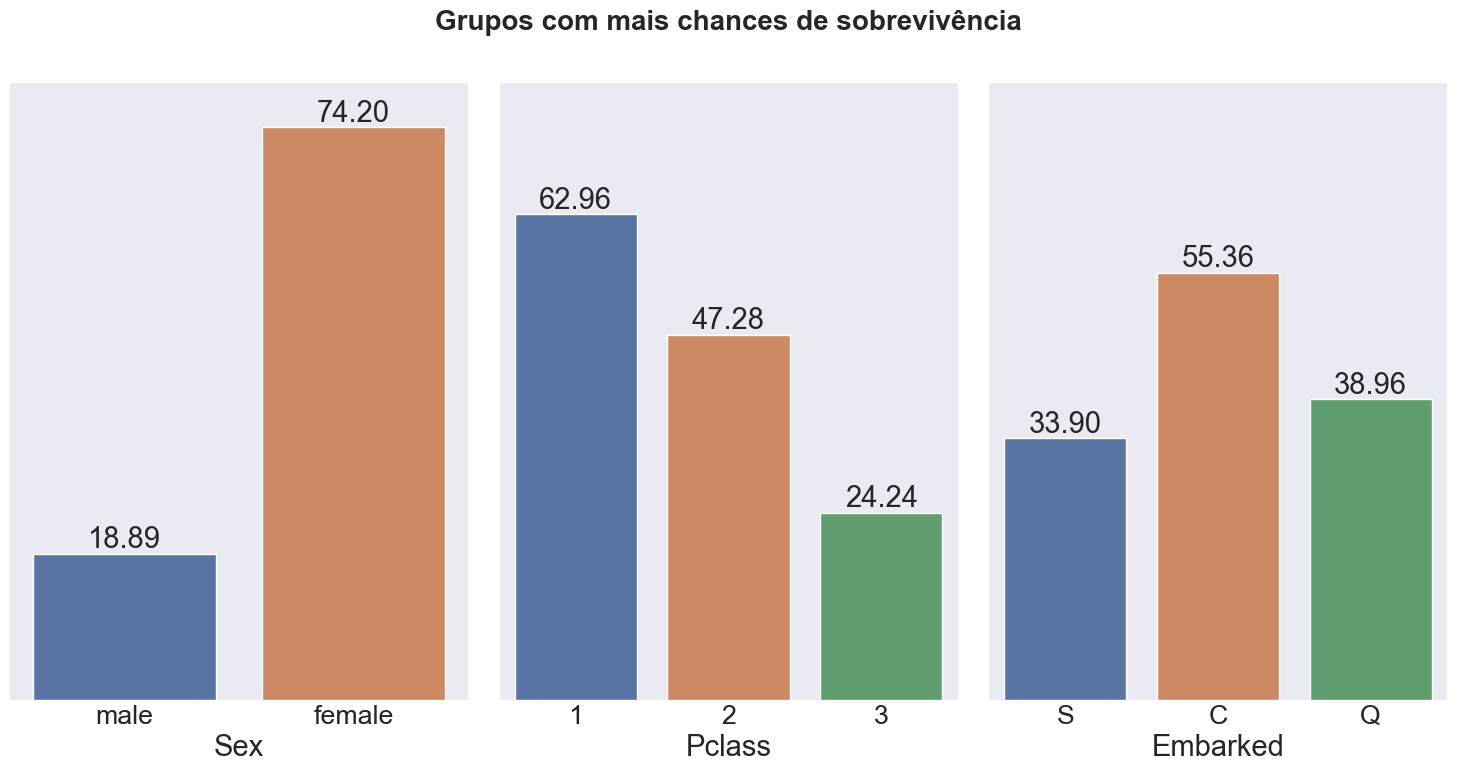

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

plt.style.use('seaborn-dark')

plt.suptitle('Grupos com mais chances de sobrevivência', fontsize=20, ha='center', fontweight='bold')

sns.barplot(data=train, x='Sex', y='Survived', ax=ax[0], ci=None)
sns.barplot(data=train, x='Pclass', y='Survived', ax=ax[1], ci=None)
sns.barplot(data=train, x='Embarked', y='Survived', ax=ax[2], ci=None)

# Anotação de valor acima das barras
for axes in ax:
    for p in axes.patches:
        value = p.get_height() * 100
        axes.annotate(f'{value:.2f}',
                      (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remover os valores de Y do eixo
for axes in ax:
    axes.set_yticklabels([])
    axes.set_ylabel('')

# Definir o intervalo do eixo Y
for axes in ax:
    axes.set_ylim([0, 0.8])

plt.tight_layout()
plt.show()

---

## Podemos agora entender as colunas de texto
- Vamos agora **adicionar um novo tratamento das colunas de texto**

In [41]:
# Verificando as colunas de texto na base de treino
train.columns[train.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [42]:
# Verificando os valores na coluna Sex
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [43]:
# e na coluna Embarked
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

- Para tratar a coluna Sex, podemos criar uma nova coluna chamada **"Male_Check"** que **vai receber 1 se o gênero for masculino e 0 se o gênero for feminino**

In [44]:
# Usando uma lambda function para fazer esse tratamento
train['Male_Check'] = train.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [45]:
# Verificando os valores
train[['Sex', 'Male_Check']].value_counts()

Sex     Male_Check
male    1             577
female  0             314
dtype: int64

- O próximo passo é fazer o mesmo para a base de teste

In [46]:
# Usando uma lambda function para fazer esse tratamento
test['Male_Check'] = test.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [47]:
# Verificando os valores
test[['Sex', 'Male_Check']].value_counts()

Sex     Male_Check
male    1             266
female  0             152
dtype: int64

- Agora, para tratar a coluna **Embarked** usando o **[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)** que irá **criar uma nova coluna para cada um dos rótulos da coluna original**

In [48]:
# Importando o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

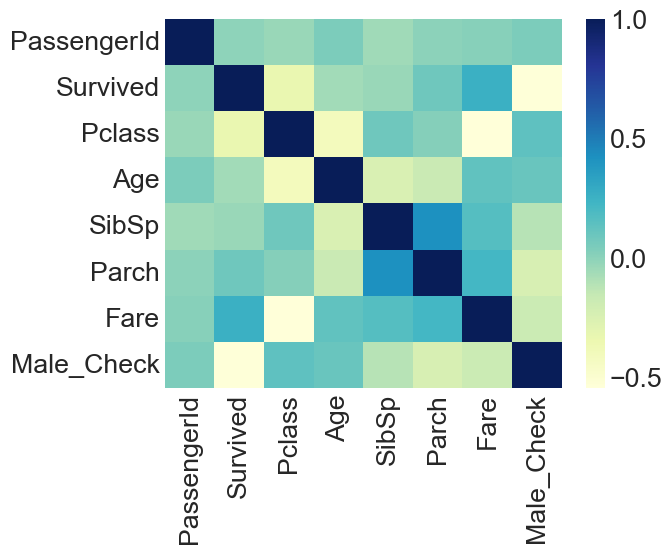

In [49]:
# Verificando o heatmap de correlação
sns.heatmap(train.corr(), cmap = 'YlGnBu')
plt.show()

## Usando essa nova base no modelo

In [50]:
# Visualizando a base
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_Check
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [51]:
# Podemos então apagar essas duas colunas de texto
train = train.drop(['Sex', 'Embarked'], axis=1)
test = test.drop(['Sex', 'Embarked'], axis=1)

### Podemos agora selecionar um modelo para classificar esses dados
- Para começar, vamos testar entre:
    
    - **Regressão Línear**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
    - **Árvore de classificação**
        - https://scikit-learn.org/stable/modules/tree.html#classification
    - **Classificação dos vizinhos mais próximos**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    - **Regressão Logística**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

- Antes de usar os algoritmos, precisamos separar a base de treino em **treino e validação**
    - Vamos fazer isso utilizando o **train_test_split**
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [52]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [53]:
# Separando a base de treino em X e y
X = train.drop(['PassengerId','Survived'],axis=1)
y = train.Survived

In [54]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

- Para a **árvore de classificação**

In [55]:
# Fazendo a importação
from sklearn import tree

In [56]:
# Criando o classificador
model_dtc = tree.DecisionTreeClassifier(random_state=42)

In [57]:
# Fazendo o fit com os dados
model_dtc = model_dtc.fit(X_train,y_train)

In [58]:
# Fazendo a previsão
y_pred_dtc = model_dtc.predict(X_val)

- Para o **KNeighborsClassifier**

In [59]:
# Importando
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# Criando o classificador
model_knn = KNeighborsClassifier(n_neighbors=3)

In [61]:
# Fazendo o fit com os dados
model_knn = model_knn.fit(X_train,y_train)

In [62]:
# Fazendo a previsão
y_pred_knn = model_knn.predict(X_val)

- Para a **Regressão Logística**

In [63]:
# Importando
from sklearn.linear_model import LogisticRegression

In [64]:
# Criando o classificador
model_lgr = LogisticRegression(random_state=42,max_iter=1000)

In [65]:
# Fazendo o fit com os dados
model_lgr = model_lgr.fit(X_train,y_train)

In [66]:
# Fazendo a previsão
y_pred_lgr = model_lgr.predict(X_val)

- Para a **Regressão Línear**

In [67]:
# Importando
from sklearn.linear_model import LinearRegression

In [68]:
# Criando o classificador
model_lnr = LinearRegression()

In [69]:
# Fazendo o fit com os dados
model_lnr = model_lnr.fit(X_train,y_train)

In [70]:
# Fazendo a previsão
y_pred_lnr = model_lnr.predict(X_val)

---

## Para finalizar, vamos avaliar esses modelos
- Para fazer essa análise, podemos usar:
    - **accuracy_score:**
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - **r2_score:**
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

- ### Avaliando a **acurácia**

In [71]:
# Importando
from sklearn.metrics import accuracy_score

In [72]:
# Para a árvore
accuracy_score(y_val, y_pred_dtc)

0.75

In [73]:
# Para o knn
accuracy_score(y_val, y_pred_knn)

0.7164179104477612

In [74]:
# Para a regressão logística
accuracy_score(y_val, y_pred_lgr)

0.8283582089552238

In [75]:
# Importando
from sklearn.metrics import r2_score
# Para a regressão línear
r2 = r2_score(y_val, y_pred_lnr)
r2

0.44818768364889217

---

### Fazendo a previsão para os dados de teste
- Vamos usar o modelo com melhor precisão para fazer o predict na base de teste

In [76]:
# Visualizando o X_train
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Male_Check
445,1,4.0,0,2,81.8583,1
650,3,25.0,0,0,7.8958,1
172,3,1.0,1,1,11.1333,0
450,2,36.0,1,2,27.7500,1
314,2,43.0,1,1,26.2500,1


In [77]:
# Visualizando a base de teste
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Male_Check
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


In [78]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_test = test.drop('PassengerId', axis=1)

In [79]:
# Utilizando a regressão logística na base de teste
y_pred = model_lgr.predict(X_test)

In [80]:
# Criando uma nova coluna com a previsão na base de teste
test['Survived'] = y_pred

In [81]:
# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = test[['PassengerId', 'Survived']]

In [82]:
# Exportando para um csv
base_envio.to_csv('Resultado.csv', index=False)

In [83]:
from IPython.display import Image

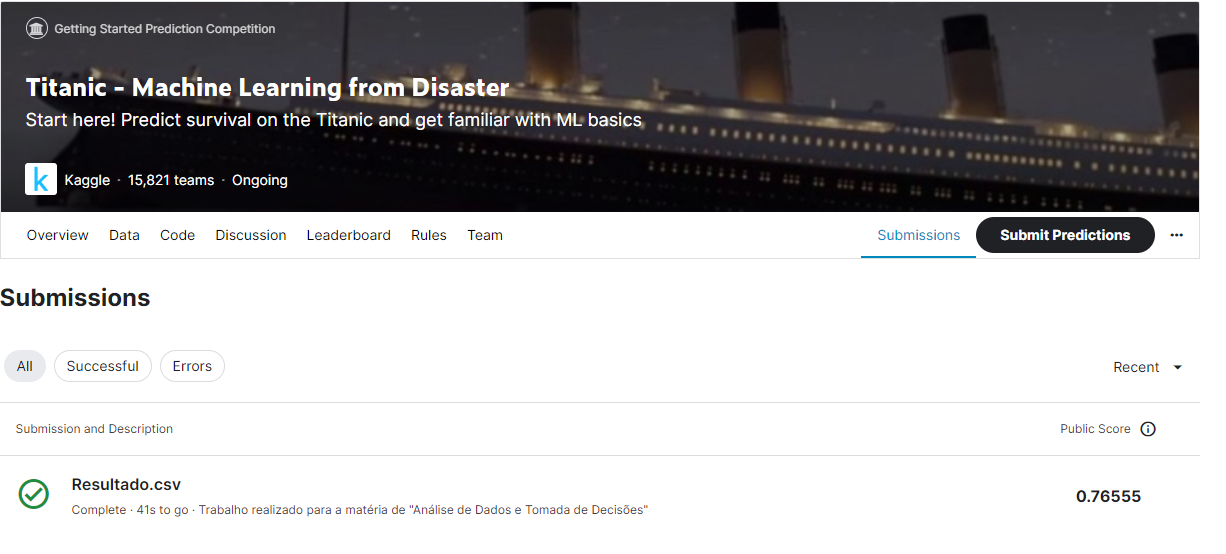

In [84]:
Image(filename='tela_kaggle.png')